# L3: Image Reasoning and Grounding

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

In [19]:
import sys
!{sys.executable} -m pip install gradio

  Using cached aiofiles-24.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached audioop_lts-0.2.1-cp313-abi3-macosx_11_0_arm64.whl.metadata (1.6 kB)
  Using cached groovy-0.1.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
  Using cached safehttpx-0.1.6-py3-none-any.whl.metadata (4.2 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached uvicorn-0.34.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached websockets-15.0.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.8 kB)
  Using cached starlette-0.46.2-py3-none-any.whl.metadata (6.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 MB 49.2 MB/s eta 0:00:00a 0:00:01
Using cached aiofiles-24.1.0-py3-none-any.whl (15 kB)
Using cached groovy-0.1.2-py3-none-any.whl (14 kB)
Using cached safehttpx-0.1.6-py3-none-any.whl (8.7 kB)
Using cached semantic_version-2.10.0-p

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Load API keys

In [2]:
import os
from utils import get_llama_api_key, get_llama_base_url, get_together_api_key

llama_api_key = get_llama_api_key()
llama_base_url = get_llama_base_url()
together_api_key = get_together_api_key()

<div style="background-color:#fff6ff; padding:13px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
<p> 💻 &nbsp; <b>Access <code>requirements.txt</code> and <code>helper.py</code> files:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>.</p>

<p> ⬇ &nbsp; <b>Download Notebooks:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Download as"</em> and select <em>"Notebook (.ipynb)"</em>.</p>

<p> 📒 &nbsp; For more help, please see the <em>"Appendix – Tips, Help, and Download"</em> Lesson.</p>
</div>

## Llama helpers

In [3]:
from utils import llama4, llama4_together

In [4]:
import base64

def encode_image_to_base64(image_path):
    """
    Encode a local image file to base64 string
    """
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

## Image Grounding

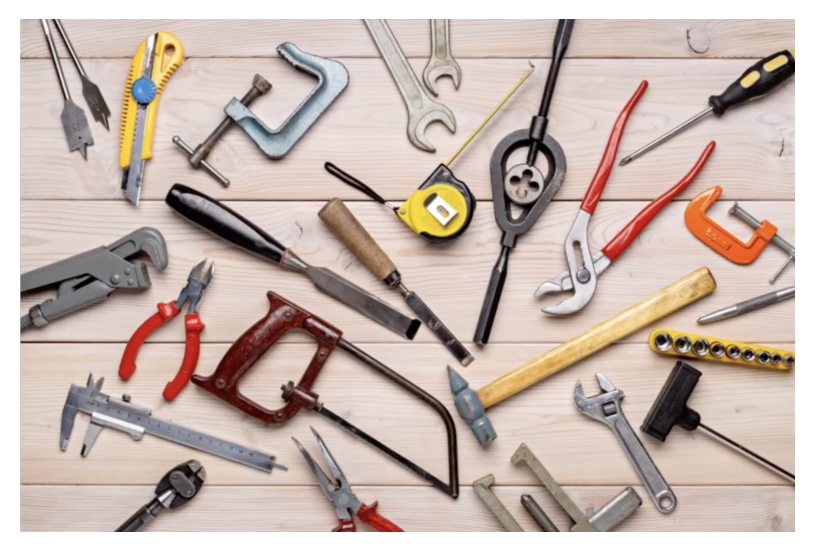

In [5]:
from utils import display_local_image
display_local_image("images/tools.png")

In [6]:
prompt = """Which tools in the image can be used for measuring length?
Provide bounding boxes for every recognized item."""

In [7]:
base64_tools = encode_image_to_base64("images/tools.png")

print(llama4(prompt,[f"data:image/jpeg;base64,{base64_tools}"]))

The tools in the image that can be used for measuring length are:

*   **Tape measure**: <BBOX>0.429,0.306,0.580,0.454</BBOX>
*   **Vernier caliper**: <BBOX>0.042,0.701,0.338,0.874</BBOX>

These two tools are commonly used for measuring lengths and distances. The tape measure is a flexible ruler that can be extended to measure longer lengths, while the vernier caliper is a precision instrument used to measure shorter lengths with high accuracy.


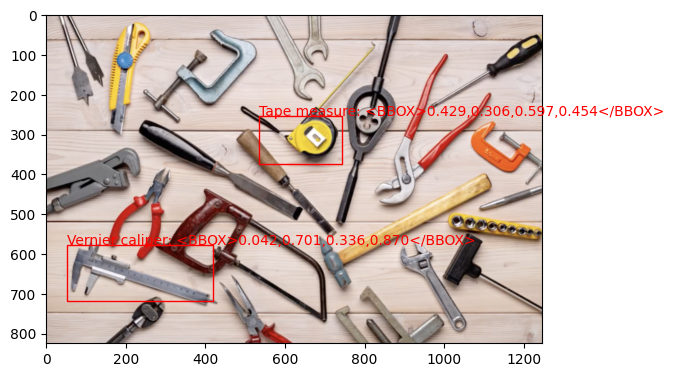

In [8]:
from utils import parse_output, draw_bounding_boxes
output = llama4(prompt, [f"data:image/jpeg;base64,{base64_tools}"])
tools = parse_output(output)
draw_bounding_boxes("images/tools.png", tools)

## Analyze table in PDF

In [9]:
from pathlib import Path
from pypdf import PdfReader

def pdf2text(file : str):
  text = ''
  with Path(file).open("rb") as f:
    reader = PdfReader(f)
    text = "\n\n".join([page.extract_text() for page in reader.pages])

  return text

In [10]:
meta_q4_2024_txt = pdf2text("Meta-Reports-Fourth-Quarter-and-Full-Year-2024-Results-2025.pdf")

In [11]:
start = meta_q4_2024_txt.find("Fourth Quarter and Full Year 2024 Financial Highlights")
print(meta_q4_2024_txt[start:start+1000])

Fourth Quarter and Full Year 2024 Financial Highlights
 Three Months Ended December 31, 
 % Change
 Twelve Months Ended December 31, 
% ChangeIn millions, except percentages andper share amounts                                                    2024  2023   2024  2023  
Revenue $     48,385  $     40,111 21 % $   164,501  $   134,902 22 %
Costs and expenses 25,020  23,727 5 % 95,121  88,151 8 %
Income from operations $     23,365  $     16,384 43 % $     69,380  $     46,751 48 %
Operating margin 48 %  41 %   42 %  35 %  
Provision for income taxes $       2,715  $      2,791 (3) % $       8,303  $       8,330 — %
Effective tax rate 12 %  17 %   12 %  18 %  
Net income $     20,838  $    14,017 49 % $     62,360  $     39,098 59 %
Diluted earnings per share (EPS) $         8.02  $        5.33 50 % $       23.86  $       14.87 60 %
 
Fourth Quarter and Full Year 2024 Operational and Other Financial Highlights
Family daily active people (DAP) – DAP was 3.35 billion on average for Decemb

In [12]:
prompt = f"""How much is 2024 operating margin based on Meta's financial
quarter report below:
{meta_q4_2024_txt}
"""
print(llama4(prompt))

According to the financial results report, Meta's operating margin for 2024 is 42%.

Here's the relevant excerpt from the report:

"Operating margin 48 %  41 %   42 %  35 %"

This indicates that the operating margin for the fourth quarter of 2024 was 48%, and for the full year 2024, it was 42%.


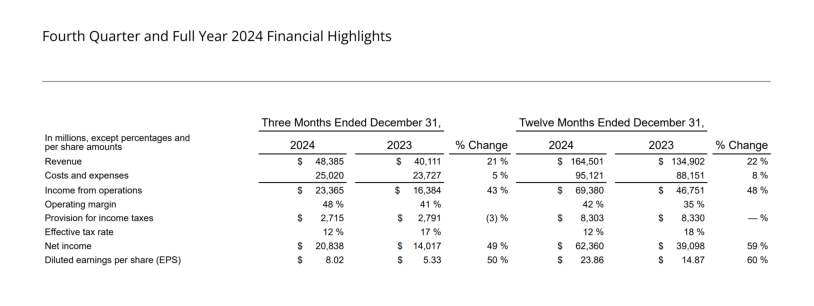

In [13]:
display_local_image("images/meta-q4-2024-highlights.png")

In [14]:
base64_meta = encode_image_to_base64("images/meta-q4-2024-highlights.png")
prompt = """How much is 2024 operating margin based on Meta's financial
report?"""
print(llama4(prompt, [f"data:image/jpeg;base64,{base64_meta}"]))

The 2024 operating margin is 42% for the full year and 48% for the three months ended December 31. 

Therefore, based on Meta's financial report, the 2024 operating margin is 42% for the full year and 48% for the fourth quarter.


## Generating code from a screenshot

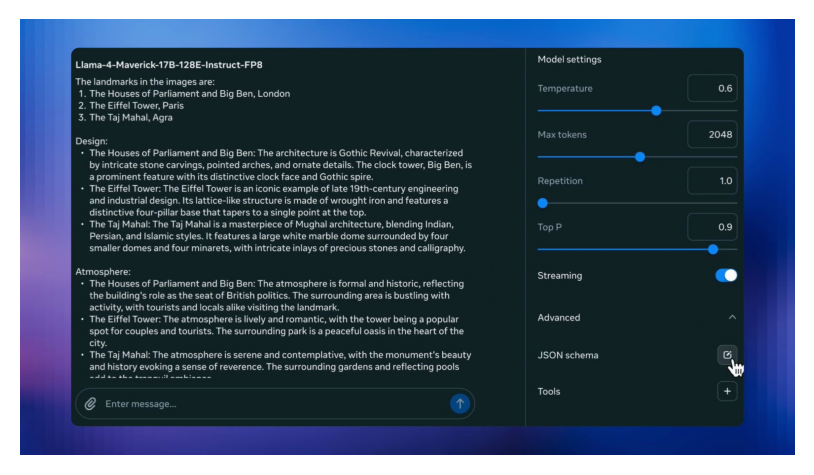

In [15]:
vid_frame_address = "images/video_frame_1440.jpg"
display_local_image(vid_frame_address)

In [16]:
base64_image = encode_image_to_base64(vid_frame_address)
prompt = """If I want to change the temperature on the image,
where should I click? Return the bounding box for the location."""
output = llama4(prompt, [f"data:image/jpeg;base64,{base64_image}"])
output

'**Temperature Setting Location**\n\nTo change the temperature setting, you should click on the slider located next to the "Temperature" label. The bounding box for this location is:\n\n* **X**: between 0.6 and the slider handle (approximately at 0.6)\n* **Y**: between the "Temperature" label and the "Max tokens" label (approximately at the middle of the two labels)\n* **Width**: approximately 150-200 pixels (the width of the slider)\n* **Height**: approximately 20-30 pixels (the height of the slider)\n\nAlternatively, you can also click on the numerical value **0.6** to the right of the slider to edit the temperature setting directly. The bounding box for this location is:\n\n* **X**: approximately 920-950 pixels\n* **Y**: approximately 150-200 pixels\n* **Width**: approximately 50-100 pixels\n* **Height**: approximately 20-30 pixels'

In [17]:
prompt = """"Write a python script that uses Gradio to implement
the chatbot UI in the image."""

output = llama4(prompt,[f"data:image/jpeg;base64,{base64_image}"],
                model="Llama-4-Maverick-17B-128E-Instruct-FP8")
print(output)

To implement the chatbot UI shown in the image using Gradio, you can follow these steps. The UI includes a chatbot interface with a settings panel on the right side. Below is a simplified Python script that demonstrates how to create a similar interface.

First, ensure you have Gradio installed. If not, you can install it using pip:

```bash
pip install gradio
```

Here's a basic example of how you might implement the chatbot UI with Gradio:

```python
import gradio as gr

def chatbot_response(message, history, temperature, max_tokens, repetition, top_p):
    # This is a placeholder function. You should replace it with your actual chatbot logic.
    # For demonstration, it simply echoes the input message.
    return f"Echo: {message}"

def update_settings(temperature, max_tokens, repetition, top_p):
    # You can use this function to update settings or perform any other action when settings change.
    # For now, it just prints the new settings.
    print(f"Temperature: {temperature}, 

In [20]:
import gradio as gr

def chatbot_settings(temp, max_tokens, repetition, top_p, streaming):
    return f"Temperature: {temp}, Max Tokens: {max_tokens}, Repetition: {repetition}, Top P: {top_p}, Streaming: {streaming}"

def main():
    with gr.Blocks() as demo:
        with gr.Row():
            with gr.Column(scale=3):
                chatbot = gr.Chatbot(label="Llama-4-Maverick-17B-128E-Instruct-FP8")
                msg = gr.Textbox(label="Enter message...")
            with gr.Column(scale=1):
                with gr.Group("Model settings"):
                    temp = gr.Slider(label="Temperature", minimum=0, maximum=1, value=0.6)
                    max_tokens = gr.Slider(label="Max tokens", minimum=0, maximum=4096, value=2048)
                    repetition = gr.Slider(label="Repetition", minimum=0, maximum=2, value=1.0)
                    top_p = gr.Slider(label="Top P", minimum=0, maximum=1, value=0.9)
                    streaming = gr.Checkbox(label="Streaming", value=True)
                    advanced = gr.Button("Advanced")
                    json_schema = gr.Button("JSON schema")
                    tools = gr.Button("Tools")

        def respond(message, history, temp, max_tokens, repetition, top_p, streaming):
            # Here you would implement your chatbot's response logic
            # For now, it just echoes the input
            bot_message = f"Echo: {message}"
            history.append((message, bot_message))
            return "", history

        msg.submit(respond, [msg, chatbot, temp, max_tokens, repetition, top_p, streaming], [msg, chatbot])

    demo.launch()

if __name__ == "__main__":
    main()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


## Solving Math

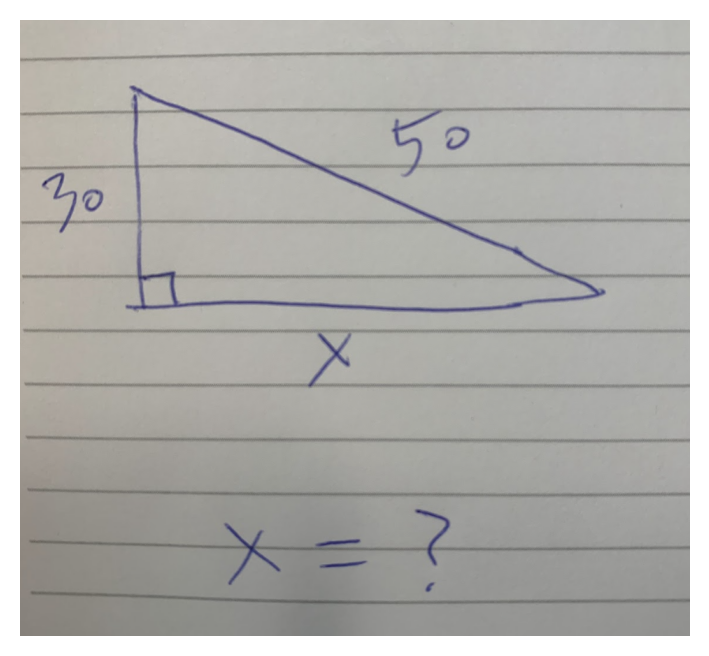

In [21]:
display_local_image("images/simple_math.png")

In [22]:
base64_math = encode_image_to_base64("images/simple_math.png")
prompt = "Answer the question in the image."
print(llama4(prompt, [f"data:image/png;base64,{base64_math}"]))

**Step 1: Identify the type of problem and relevant information.**

This is a right triangle problem, and we can use the Pythagorean theorem to solve it.

*   The Pythagorean theorem states that in a right-angled triangle, the square of the length of the hypotenuse (the side opposite the right angle) is equal to the sum of the squares of the lengths of the other two sides.

**Step 2: Label the given information.**

*   One leg of the triangle = 30
*   Hypotenuse = 50
*   Other leg of the triangle = $x$

**Step 3: Apply the Pythagorean theorem.**

*   $a^2 + b^2 = c^2$, where $c$ is the length of the hypotenuse, and $a$ and $b$ are the lengths of the other two sides.

**Step 4: Substitute the given values into the equation.**

*   $30^2 + x^2 = 50^2$

**Step 5: Solve for $x$.**

*   $900 + x^2 = 2500$
*   $x^2 = 2500 - 900$
*   $x^2 = 1600$
*   $x = \sqrt{1600}$
*   $x = 40$

**Conclusion:**

The value of $x$ is 40.


## Analyzing computer screen

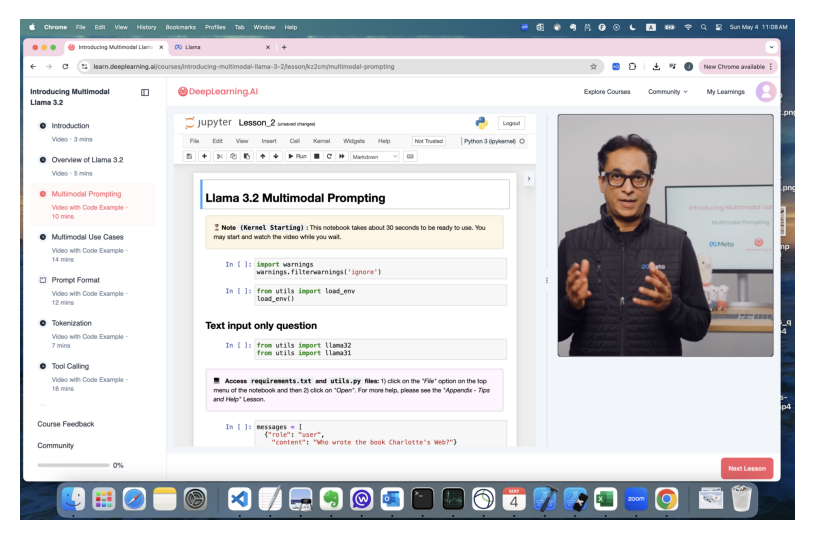

In [23]:
display_local_image("images/browser_screenshot.png")

In [24]:
base64_img = encode_image_to_base64("images/browser_screenshot.png")
prompt = """Describe the screenshot in detail,
including browser URL and tabs."""
print(llama4(prompt,[f"data:image/png;base64,{base64_img}"]))

The image shows a screenshot of a computer screen displaying a web page with a video and code. 

*   The top of the screen has a browser toolbar with various icons and menus, including:
    *   Chrome
    *   File
    *   Edit
    *   View
    *   History
    *   Bookmarks
    *   Profiles
    *   Tab
    *   Window
    *   Help
*   Below the toolbar is a URL bar with the text "Introducing Multimodal Llama 3.2" and a dropdown menu with options such as "Llama" and "learn.deeplearning.ai/courses/introducing-multimodal-llama-3-2/lesson/kz2cm/multimodal-prompting".
*   The main content of the page is divided into two sections:
    *   On the left side, there is a list of lessons with titles such as "Introduction", "Overview of Llama 3.2", "Multimodal Prompting", and others.
    *   On the right side, there is a video player showing a man speaking in front of a whiteboard, with a code window below it displaying Python code.
*   At the bottom of the screen, there is a dock with various icons

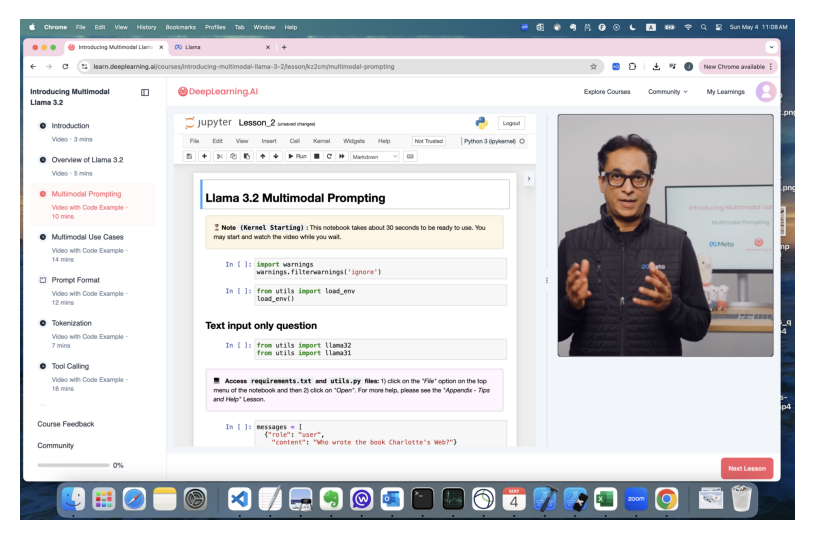

To proceed to the next lesson, click the red button labeled "Next Lesson" located at the bottom right corner of the screen.


In [25]:
display_local_image("images/browser_screenshot.png")
prompt = """If I want to go to the next lesson, what should I do?"""
print(llama4(prompt,[f"data:image/png;base64,{base64_img}"]))